# Practicing Julia
resources: https://www.analyticsvidhya.com/blog/2017/10/comprehensive-tutorial-learn-data-science-julia-from-scratch/


In [75]:
using Tables 

In [1]:
# Load Packages dataframe packages
using Pkg, JuliaDB, DataFrames, DataFramesMeta, Query, IndexedTables, Tables, CSV

In [2]:
# Plotting packages
using Plotly, Plots, StatsPlots, GraphRecipes, RecipesBase, Statistics #, JuliaStats

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-13618135495133043692\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-17218990280066904419\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-13618135495133043692\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [3]:
# Stats and ML packages
using Statistics

In [41]:
ENV["LINES"] = 2000
ENV["COLUMNS"] = 500

500

In [4]:
data_file = "C:\\Users\\marqu\\OneDrive\\Documents\\Kaggle\\House Prices Advanced Regression Techniques\\Data\\train.csv"

"C:\\Users\\marqu\\OneDrive\\Documents\\Kaggle\\House Prices Advanced Regression Techniques\\Data\\train.csv"

In [28]:
# Load Data
housing = loadtable(data_file)

Table with 1460 rows, 81 columns:
Columns:
#   colname        type
────────────────────────────────────────
1   Id             Int64
2   MSSubClass     Int64
3   MSZoning       String
4   LotFrontage    Union{Missing, Int64}
5   LotArea        Int64
6   Street         String
7   Alley          String
8   LotShape       String
9   LandContour    String
10  Utilities      String
11  LotConfig      String
12  LandSlope      String
13  Neighborhood   String
14  Condition1     String
15  Condition2     String
16  BldgType       String
17  HouseStyle     String
18  OverallQual    Int64
19  OverallCond    Int64
20  YearBuilt      Int64
21  YearRemodAdd   Int64
22  RoofStyle      String
23  RoofMatl       String
24  Exterior1st    String
25  Exterior2nd    String
26  MasVnrType     String
27  MasVnrArea     Union{Missing, Int64}
28  ExterQual      String
29  ExterCond      String
30  Foundation     String
31  BsmtQual       String
32  BsmtCond       String
33  BsmtExposure   String
34  BsmtFin

In [9]:
housing = CSV.read(data_file; missingstrings=["", "NA"])

1460×81 DataFrame. Omitted printing of 42 columns
│ Row  │ Id    │ MSSubClass │ MSZoning │ LotFrontage │ LotArea │ Street │ Alley   │ LotShape │ LandContour │ Utilities │ LotConfig │ LandSlope │ Neighborhood │ Condition1 │ Condition2 │ BldgType │ HouseStyle │ OverallQual │ OverallCond │ YearBuilt │ YearRemodAdd │ RoofStyle │ RoofMatl │ Exterior1st │ Exterior2nd │ MasVnrType │ MasVnrArea │ ExterQual │ ExterCond │ Foundation │ BsmtQual │ BsmtCond │ BsmtExposure │ BsmtFinType1 │ BsmtFinSF1 │ BsmtFinType2 │ BsmtFinSF2 │ BsmtUnfSF │ TotalBsmtSF │
│      │ Int64 │ Int64      │ String   │ Int64⍰      │ Int64   │ String │ String⍰ │ String   │ String      │ String    │ String    │ String    │ String       │ String     │ String     │ String   │ String     │ Int64       │ Int64       │ Int64     │ Int64        │ String    │ String   │ String      │ String      │ String⍰    │ Int64⍰     │ String    │ String    │ String     │ String⍰  │ String⍰  │ String⍰      │ String⍰      │ Int64      │ String⍰      │ Int64      │ Int64     │ Int64       │
├──────┼───────┼────────────┼──────────┼─────────────┼─────────┼────────┼─────────┼──────────┼─────────────┼───────────┼───────────┼───────────┼──────────────┼────────────┼────────────┼──────────┼────────────┼─────────────┼─────────────┼───────────┼──────────────┼───────────┼──────────┼─────────────┼─────────────┼────────────┼────────────┼───────────┼───────────┼────────────┼──────────┼──────────┼──────────────┼──────────────┼────────────┼──────────────┼────────────┼───────────┼─────────────┤
│ 1    │ 1     │ 60         │ RL       │ 65          │ 8450    │ Pave   │ missing │ Reg      │ Lvl         │ AllPub    │ Inside    │ Gtl       │ CollgCr      │ Norm       │ Norm       │ 1Fam     │ 2Story     │ 7           │ 5           │ 2003      │ 2003         │ Gable     │ CompShg  │ VinylSd     │ VinylSd     │ BrkFace    │ 196        │ Gd        │ TA        │ PConc      │ Gd       │ TA       │ No           │ GLQ          │ 706        │ Unf          │ 0          │ 150       │ 856         │
│ 2    │ 2     │ 20         │ RL       │ 80          │ 9600    │ Pave   │ missing │ Reg      │ Lvl         │ AllPub    │ FR2       │ Gtl       │ Veenker      │ Feedr      │ Norm       │ 1Fam     │ 1Story     │ 6           │ 8           │ 1976      │ 1976         │ Gable     │ CompShg  │ MetalSd     │ MetalSd     │ None       │ 0          │ TA        │ TA        │ CBlock     │ Gd       │ TA       │ Gd           │ ALQ          │ 978        │ Unf          │ 0          │ 284       │ 1262        │
│ 3    │ 3     │ 60         │ RL       │ 68          │ 11250   │ Pave   │ missing │ IR1      │ Lvl         │ AllPub    │ Inside    │ Gtl       │ CollgCr      │ Norm       │ Norm       │ 1Fam     │ 2Story     │ 7           │ 5           │ 2001      │ 2002         │ Gable     │ CompShg  │ VinylSd     │ VinylSd     │ BrkFace    │ 162        │ Gd        │ TA        │ PConc      │ Gd       │ TA       │ Mn           │ GLQ          │ 486        │ Unf          │ 0          │ 434       │ 920         │
│ 4    │ 4     │ 70         │ RL       │ 60          │ 9550    │ Pave   │ missing │ IR1      │ Lvl         │ AllPub    │ Corner    │ Gtl       │ Crawfor      │ Norm       │ Norm       │ 1Fam     │ 2Story     │ 7           │ 5           │ 1915      │ 1970         │ Gable     │ CompShg  │ Wd Sdng     │ Wd Shng     │ None       │ 0          │ TA        │ TA        │ BrkTil     │ TA       │ Gd       │ No           │ ALQ          │ 216        │ Unf          │ 0          │ 540       │ 756         │
│ 5    │ 5     │ 60         │ RL       │ 84          │ 14260   │ Pave   │ missing │ IR1      │ Lvl         │ AllPub    │ FR2       │ Gtl       │ NoRidge      │ Norm       │ Norm       │ 1Fam     │ 2Story     │ 8           │ 5           │ 2000      │ 2000         │ Gable     │ CompShg  │ VinylSd     │ VinylSd     │ BrkFace    │ 350        │ Gd        │ TA        │ PConc      │ Gd       │ TA       │ Av           │ GLQ          │ 655        │ Unf          │ 0    

In [6]:
typeof(housing)

IndexedTable{StructArrays.StructArray{NamedTuple{(:Id, :MSSubClass, :MSZoning, :LotFrontage, :LotArea, :Street, :Alley, :LotShape, :LandContour, :Utilities, :LotConfig, :LandSlope, :Neighborhood, :Condition1, :Condition2, :BldgType, :HouseStyle, :OverallQual, :OverallCond, :YearBuilt, :YearRemodAdd, :RoofStyle, :RoofMatl, :Exterior1st, :Exterior2nd, :MasVnrType, :MasVnrArea, :ExterQual, :ExterCond, :Foundation, :BsmtQual, :BsmtCond, :BsmtExposure, :BsmtFinType1, :BsmtFinSF1, :BsmtFinType2, :BsmtFinSF2, :BsmtUnfSF, :TotalBsmtSF, :Heating, :HeatingQC, :CentralAir, :Electrical, Symbol("1stFlrSF"), Symbol("2ndFlrSF"), :LowQualFinSF, :GrLivArea, :BsmtFullBath, :BsmtHalfBath, :FullBath, :HalfBath, :BedroomAbvGr, :KitchenAbvGr, :KitchenQual, :TotRmsAbvGrd, :Functional, :Fireplaces, :FireplaceQu, :GarageType, :GarageYrBlt, :GarageFinish, :GarageCars, :GarageArea, :GarageQual, :GarageCond, :PavedDrive, :WoodDeckSF, :OpenPorchSF, :EnclosedPorch, Symbol("3SsnPorch"), :ScreenPorch, :PoolArea, :Poo

In [10]:
housing_df = housing |> DataFrame

1460×81 DataFrame. Omitted printing of 42 columns
│ Row  │ Id    │ MSSubClass │ MSZoning │ LotFrontage │ LotArea │ Street │ Alley   │ LotShape │ LandContour │ Utilities │ LotConfig │ LandSlope │ Neighborhood │ Condition1 │ Condition2 │ BldgType │ HouseStyle │ OverallQual │ OverallCond │ YearBuilt │ YearRemodAdd │ RoofStyle │ RoofMatl │ Exterior1st │ Exterior2nd │ MasVnrType │ MasVnrArea │ ExterQual │ ExterCond │ Foundation │ BsmtQual │ BsmtCond │ BsmtExposure │ BsmtFinType1 │ BsmtFinSF1 │ BsmtFinType2 │ BsmtFinSF2 │ BsmtUnfSF │ TotalBsmtSF │
│      │ Int64 │ Int64      │ String   │ Int64⍰      │ Int64   │ String │ String⍰ │ String   │ String      │ String    │ String    │ String    │ String       │ String     │ String     │ String   │ String     │ Int64       │ Int64       │ Int64     │ Int64        │ String    │ String   │ String      │ String      │ String⍰    │ Int64⍰     │ String    │ String    │ String     │ String⍰  │ String⍰  │ String⍰      │ String⍰      │ Int64      │ String⍰      │ Int64      │ Int64     │ Int64       │
├──────┼───────┼────────────┼──────────┼─────────────┼─────────┼────────┼─────────┼──────────┼─────────────┼───────────┼───────────┼───────────┼──────────────┼────────────┼────────────┼──────────┼────────────┼─────────────┼─────────────┼───────────┼──────────────┼───────────┼──────────┼─────────────┼─────────────┼────────────┼────────────┼───────────┼───────────┼────────────┼──────────┼──────────┼──────────────┼──────────────┼────────────┼──────────────┼────────────┼───────────┼─────────────┤
│ 1    │ 1     │ 60         │ RL       │ 65          │ 8450    │ Pave   │ missing │ Reg      │ Lvl         │ AllPub    │ Inside    │ Gtl       │ CollgCr      │ Norm       │ Norm       │ 1Fam     │ 2Story     │ 7           │ 5           │ 2003      │ 2003         │ Gable     │ CompShg  │ VinylSd     │ VinylSd     │ BrkFace    │ 196        │ Gd        │ TA        │ PConc      │ Gd       │ TA       │ No           │ GLQ          │ 706        │ Unf          │ 0          │ 150       │ 856         │
│ 2    │ 2     │ 20         │ RL       │ 80          │ 9600    │ Pave   │ missing │ Reg      │ Lvl         │ AllPub    │ FR2       │ Gtl       │ Veenker      │ Feedr      │ Norm       │ 1Fam     │ 1Story     │ 6           │ 8           │ 1976      │ 1976         │ Gable     │ CompShg  │ MetalSd     │ MetalSd     │ None       │ 0          │ TA        │ TA        │ CBlock     │ Gd       │ TA       │ Gd           │ ALQ          │ 978        │ Unf          │ 0          │ 284       │ 1262        │
│ 3    │ 3     │ 60         │ RL       │ 68          │ 11250   │ Pave   │ missing │ IR1      │ Lvl         │ AllPub    │ Inside    │ Gtl       │ CollgCr      │ Norm       │ Norm       │ 1Fam     │ 2Story     │ 7           │ 5           │ 2001      │ 2002         │ Gable     │ CompShg  │ VinylSd     │ VinylSd     │ BrkFace    │ 162        │ Gd        │ TA        │ PConc      │ Gd       │ TA       │ Mn           │ GLQ          │ 486        │ Unf          │ 0          │ 434       │ 920         │
│ 4    │ 4     │ 70         │ RL       │ 60          │ 9550    │ Pave   │ missing │ IR1      │ Lvl         │ AllPub    │ Corner    │ Gtl       │ Crawfor      │ Norm       │ Norm       │ 1Fam     │ 2Story     │ 7           │ 5           │ 1915      │ 1970         │ Gable     │ CompShg  │ Wd Sdng     │ Wd Shng     │ None       │ 0          │ TA        │ TA        │ BrkTil     │ TA       │ Gd       │ No           │ ALQ          │ 216        │ Unf          │ 0          │ 540       │ 756         │
│ 5    │ 5     │ 60         │ RL       │ 84          │ 14260   │ Pave   │ missing │ IR1      │ Lvl         │ AllPub    │ FR2       │ Gtl       │ NoRidge      │ Norm       │ Norm       │ 1Fam     │ 2Story     │ 8           │ 5           │ 2000      │ 2000         │ Gable     │ CompShg  │ VinylSd     │ VinylSd     │ BrkFace    │ 350        │ Gd        │ TA        │ PConc      │ Gd       │ TA       │ Av           │ GLQ          │ 655        │ Unf          │ 0    

In [19]:
typeof(housing_df)

DataFrame

In [15]:
housing_describe = describe(housing_df)

81×8 DataFrame
│ Row │ variable      │ mean      │ min     │ median   │ max     │ nunique │ nmissing │ eltype                 │
│     │ Symbol        │ Union…    │ Any     │ Union…   │ Any     │ Union…  │ Union…   │ Type                   │
├─────┼───────────────┼───────────┼─────────┼──────────┼─────────┼─────────┼──────────┼────────────────────────┤
│ 1   │ Id            │ 730.5     │ 1       │ 730.5    │ 1460    │         │          │ Int64                  │
│ 2   │ MSSubClass    │ 56.8973   │ 20      │ 50.0     │ 190     │         │          │ Int64                  │
│ 3   │ MSZoning      │           │ C (all) │          │ RM      │ 5       │          │ String                 │
│ 4   │ LotFrontage   │ 70.05     │ 21      │ 69.0     │ 313     │         │ 259      │ Union{Missing, Int64}  │
│ 5   │ LotArea       │ 10516.8   │ 1300    │ 9478.5   │ 215245  │         │          │ Int64                  │
│ 6   │ Street        │           │ Grvl    │          │ Pave    │ 2       │          │ String                 │
│ 7   │ Alley         │           │ Grvl    │          │ Pave    │ 2       │ 1369     │ Union{Missing, String} │
│ 8   │ LotShape      │           │ IR1     │          │ Reg     │ 4       │          │ String                 │
│ 9   │ LandContour   │           │ Bnk     │          │ Lvl     │ 4       │          │ String                 │
│ 10  │ Utilities     │           │ AllPub  │          │ NoSeWa  │ 2       │          │ String                 │
│ 11  │ LotConfig     │           │ Corner  │          │ Inside  │ 5       │          │ String                 │
│ 12  │ LandSlope     │           │ Gtl     │          │ Sev     │ 3       │          │ String                 │
│ 13  │ Neighborhood  │           │ Blmngtn │          │ Veenker │ 25      │          │ String                 │
│ 14  │ Condition1    │           │ Artery  │          │ RRNn    │ 9       │          │ String                 │
│ 15  │ Condition2    │           │ Artery  │          │ RRNn    │ 8       │          │ String                 │
│ 16  │ BldgType      │           │ 1Fam    │          │ TwnhsE  │ 5       │          │ String                 │
│ 17  │ HouseStyle    │           │ 1.5Fin  │          │ SLvl    │ 8       │          │ String                 │
│ 18  │ OverallQual   │ 6.09932   │ 1       │ 6.0      │ 10      │         │          │ Int64                  │
│ 19  │ OverallCond   │ 5.57534   │ 1       │ 5.0      │ 9       │         │          │ Int64                  │
│ 20  │ YearBuilt     │ 1971.27   │ 1872    │ 1973.0   │ 2010    │         │          │ Int64                  │
│ 21  │ YearRemodAdd  │ 1984.87   │ 1950    │ 1994.0   │ 2010    │         │          │ Int64                  │
│ 22  │ RoofStyle     │           │ Flat    │          │ Shed    │ 6       │          │ String                 │
│ 23  │ RoofMatl      │           │ ClyTile │          │ WdShngl │ 8       │          │ String                 │
│ 24  │ Exterior1st   │           │ AsbShng │          │ WdShing │ 15      │          │ String                 │
│ 25  │ Exterior2nd   │           │ AsbShng │          │ Wd Shng │ 16      │          │ String                 │
│ 26  │ MasVnrType    │           │ BrkCmn  │          │ Stone   │ 4       │ 8        │ Union{Missing, String} │
│ 27  │ MasVnrArea    │ 103.685   │ 0       │ 0.0      │ 1600    │         │ 8        │ Union{Missing, Int64}  │
│ 28  │ ExterQual     │           │ Ex      │          │ TA      │ 4       │          │ String                 │
│ 29  │ ExterCond     │           │ Ex      │          │ TA      │ 5       │          │ String                 │
│ 30  │ Foundation    │           │ BrkTil  │          │ Wood    │ 6       │          │ String                 │
│ 31  │ BsmtQual      │           │ Ex      │          │ TA      │ 4       │ 37       │ Union{Missing, String} │
│ 32  │ BsmtCond      │           │ Fa      │          │ TA      │ 4       │ 37       │ Union{Missing, String} │
│ 33  │ BsmtExposure  │       

In [14]:
#Statistics.cor(Matrix(housing_df))

In [14]:
# Proves that there is no "missing" data in the table...does not mean NA
# length(completecases(housing_df))
ismissing.(first(housing_df, 10))

10×81 DataFrame. Omitted printing of 74 columns
│ Row │ Id   │ MSSubClass │ MSZoning │ LotFrontage │ LotArea │ Street │ Alley │
│     │ Bool │ Bool       │ Bool     │ Bool        │ Bool    │ Bool   │ Bool  │
├─────┼──────┼────────────┼──────────┼─────────────┼─────────┼────────┼───────┤
│ 1   │ 0    │ 0          │ 0        │ 0           │ 0       │ 0      │ 1     │
│ 2   │ 0    │ 0          │ 0        │ 0           │ 0       │ 0      │ 1     │
│ 3   │ 0    │ 0          │ 0        │ 0           │ 0       │ 0      │ 1     │
│ 4   │ 0    │ 0          │ 0        │ 0           │ 0       │ 0      │ 1     │
│ 5   │ 0    │ 0          │ 0        │ 0           │ 0       │ 0      │ 1     │
│ 6   │ 0    │ 0          │ 0        │ 0           │ 0       │ 0      │ 1     │
│ 7   │ 0    │ 0          │ 0        │ 0           │ 0       │ 0      │ 1     │
│ 8   │ 0    │ 0          │ 0        │ 1           │ 0       │ 0      │ 1     │
│ 9   │ 0    │ 0          │ 0        │ 0           │ 0       │ 0      │ 1     │
│ 10  │ 0    │ 0          │ 0        │ 0           │ 0       │ 0      │ 1     │

In [28]:
length(findall(ismissing.(housing_df[:, :Alley]))) # finds the index of the missing value.

1369

In [31]:
sum(completecases(housing_df))

0

In [37]:
count.(ismissing, Vector.(eachrow(housing_df)))

1460-element Array{Int64,1}:
  5
  4
  4
  4
  4
  3
  4
  4
  4
  4
  5
  4
  6
  ⋮
  4
 10
 10
  4
  5
 10
  4
  4
  3
  2
  5
  5

In [38]:
count.(ismissing, Vector.(eachcol(housing_df)))

81-element Array{Int64,1}:
    0
    0
    0
  259
    0
    0
 1369
    0
    0
    0
    0
    0
    0
    ⋮
    0
    0
    0
 1453
 1179
 1406
    0
    0
    0
    0
    0
    0

In [17]:
findall(ismissing.(housing_df[:, :BsmtQual]))

37-element Array{Int64,1}:
   18
   40
   91
  103
  157
  183
  260
  343
  363
  372
  393
  521
  533
  534
  554
  647
  706
  737
  750
  779
  869
  895
  898
  985
 1001
 1012
 1036
 1046
 1049
 1050
 1091
 1180
 1217
 1219
 1233
 1322
 1413

In [26]:
nrows, ncols = size(housing_df)
for row in 1:nrows
      for col in 1:ncols
        if ismissing(housing_df[row,col])
         println("$(names(housing_df)[col]) value for $(housing_df[row,col]) is missing!")
        end
      end
end

Alley value for missing is missing!
FireplaceQu value for missing is missing!
PoolQC value for missing is missing!
Fence value for missing is missing!
MiscFeature value for missing is missing!
Alley value for missing is missing!
PoolQC value for missing is missing!
Fence value for missing is missing!
MiscFeature value for missing is missing!
Alley value for missing is missing!
PoolQC value for missing is missing!
Fence value for missing is missing!
MiscFeature value for missing is missing!
Alley value for missing is missing!
PoolQC value for missing is missing!
Fence value for missing is missing!
MiscFeature value for missing is missing!
Alley value for missing is missing!
PoolQC value for missing is missing!
Fence value for missing is missing!
MiscFeature value for missing is missing!
Alley value for missing is missing!
FireplaceQu value for missing is missing!
PoolQC value for missing is missing!
Alley value for missing is missing!
PoolQC value for missing is missing!
Fence value for

In [16]:
levels(housing_df.Exterior1st)

15-element Array{String,1}:
 "AsbShng"
 "AsphShn"
 "BrkComm"
 "BrkFace"
 "CBlock" 
 "CemntBd"
 "HdBoard"
 "ImStucc"
 "MetalSd"
 "Plywood"
 "Stone"  
 "Stucco" 
 "VinylSd"
 "Wd Sdng"
 "WdShing"

In [14]:
# How many neighborhoods are there in the dataset
countmap(housing_df[:Neighborhood])

UndefVarError: UndefVarError: countmap not defined

In [39]:
# Delete Columns with lots of missing
#select!(housing_df, not(:Alleys,:PoolQC,:Fence)) 
delete!(housing_df,[:Fence,:PoolQC,:MiscFeature,:])

┌ Warning: `delete!(df::AbstractDataFrame, cols::Any)` is deprecated, use `select!(df, Not(cols))` instead.
│   caller = top-level scope at In[39]:1
└ @ Core In[39]:1


ArgumentError: ArgumentError: column name :Fence not found in the data frame

In [42]:
# FireplaceQu, BsmtQual
@where(housing_df,ismissing.(:FireplaceQu)) 


690×78 DataFrame. Omitted printing of 39 columns
│ Row │ Id    │ MSSubClass │ MSZoning │ LotFrontage │ LotArea │ Street │ LotShape │ LandContour │ Utilities │ LotConfig │ LandSlope │ Neighborhood │ Condition1 │ Condition2 │ BldgType │ HouseStyle │ OverallQual │ OverallCond │ YearBuilt │ YearRemodAdd │ RoofStyle │ RoofMatl │ Exterior1st │ Exterior2nd │ MasVnrType │ MasVnrArea │ ExterQual │ ExterCond │ Foundation │ BsmtQual │ BsmtCond │ BsmtExposure │ BsmtFinType1 │ BsmtFinSF1 │ BsmtFinType2 │ BsmtFinSF2 │ BsmtUnfSF │ TotalBsmtSF │ Heating │
│     │ Int64 │ Int64      │ String   │ Int64⍰      │ Int64   │ String │ String   │ String      │ String    │ String    │ String    │ String       │ String     │ String     │ String   │ String     │ Int64       │ Int64       │ Int64     │ Int64        │ String    │ String   │ String      │ String      │ String⍰    │ Int64⍰     │ String    │ String    │ String     │ String⍰  │ String⍰  │ String⍰      │ String⍰      │ Int64      │ String⍰      │ Int64      │ Int64     │ Int64       │ String  │
├─────┼───────┼────────────┼──────────┼─────────────┼─────────┼────────┼──────────┼─────────────┼───────────┼───────────┼───────────┼──────────────┼────────────┼────────────┼──────────┼────────────┼─────────────┼─────────────┼───────────┼──────────────┼───────────┼──────────┼─────────────┼─────────────┼────────────┼────────────┼───────────┼───────────┼────────────┼──────────┼──────────┼──────────────┼──────────────┼────────────┼──────────────┼────────────┼───────────┼─────────────┼─────────┤
│ 1   │ 1     │ 60         │ RL       │ 65          │ 8450    │ Pave   │ Reg      │ Lvl         │ AllPub    │ Inside    │ Gtl       │ CollgCr      │ Norm       │ Norm       │ 1Fam     │ 2Story     │ 7           │ 5           │ 2003      │ 2003         │ Gable     │ CompShg  │ VinylSd     │ VinylSd     │ BrkFace    │ 196        │ Gd        │ TA        │ PConc      │ Gd       │ TA       │ No           │ GLQ          │ 706        │ Unf          │ 0          │ 150       │ 856         │ GasA    │
│ 2   │ 6     │ 50         │ RL       │ 85          │ 14115   │ Pave   │ IR1      │ Lvl         │ AllPub    │ Inside    │ Gtl       │ Mitchel      │ Norm       │ Norm       │ 1Fam     │ 1.5Fin     │ 5           │ 5           │ 1993      │ 1995         │ Gable     │ CompShg  │ VinylSd     │ VinylSd     │ None       │ 0          │ TA        │ TA        │ Wood       │ Gd       │ TA       │ No           │ GLQ          │ 732        │ Unf          │ 0          │ 64        │ 796         │ GasA    │
│ 3   │ 11    │ 20         │ RL       │ 70          │ 11200   │ Pave   │ Reg      │ Lvl         │ AllPub    │ Inside    │ Gtl       │ Sawyer       │ Norm       │ Norm       │ 1Fam     │ 1Story     │ 5           │ 5           │ 1965      │ 1965         │ Hip       │ CompShg  │ HdBoard     │ HdBoard     │ None       │ 0          │ TA        │ TA        │ CBlock     │ TA       │ TA       │ No           │ Rec          │ 906        │ Unf          │ 0          │ 134       │ 1040        │ GasA    │
│ 4   │ 13    │ 20         │ RL       │ missing     │ 12968   │ Pave   │ IR2      │ Lvl         │ AllPub    │ Inside    │ Gtl       │ Sawyer       │ Norm       │ Norm       │ 1Fam     │ 1Story     │ 5           │ 6           │ 1962      │ 1962         │ Hip       │ CompShg  │ HdBoard     │ Plywood     │ None       │ 0          │ TA        │ TA        │ CBlock     │ TA       │ TA       │ No           │ ALQ          │ 737        │ Unf          │ 0          │ 175       │ 912         │ GasA    │
│ 5   │ 16    │ 45         │ RM       │ 51          │ 6120    │ Pave   │ Reg      │ Lvl         │ AllPub    │ Corner    │ Gtl       │ BrkSide      │ Norm       │ Norm       │ 1Fam     │ 1.5Unf     │ 7           │ 8           │ 1929      │ 2001         │ Gable     │ CompShg  │ Wd Sdng     │ Wd Sdng     │ None       │ 0          │ TA        │ TA        │ BrkTil     │ TA       │ TA       │ No           │ Unf          │ 0          │ Unf          │ 0          │ 832       │

In [20]:
x = @from i in housing_df begin
    @where i.SalePrice> 500000
    @select {i.Id, i.HouseStyle}
    @collect DataFrame
end

LoadError: syntax: "\" is not a unary operator

# Graphing

In [42]:
gr()

Plots.GRBackend()

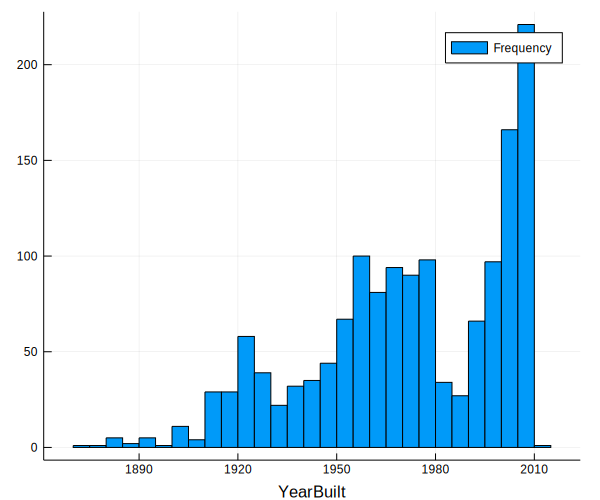

In [43]:
Plots.histogram((housing_df[:YearBuilt]),bins=50,xlabel="YearBuilt",labels="Frequency")

In [46]:
plotly()

Plots.PlotlyBackend()

In [47]:
Plots.histogram((housing_df[:YearBuilt]),bins=50,xlabel="YearBuilt",labels="Frequency")

In [48]:
Plots.plot(housing_df[:GrLivArea],housing_df[:SalePrice],seriestype=:scatter,title="My Scatter Plot")

In [24]:
Plots.scatter(housing_df[:GrLivArea],housing_df[:SalePrice], title = "My Scatter Plot")

In [78]:
gr(size = (600, 500))

Plots.GRBackend()

In [79]:
@df housing_df plot(:SalePrice,:GrLiveArea)

UndefVarError: UndefVarError: plot not defined

In [2]:
[1 2; 3 4][:]

4-element Array{Int64,1}:
 1
 3
 2
 4

In [56]:
# Correlation

In [25]:
dump()

MethodError: MethodError: no method matching dump()
Closest candidates are:
  dump(!Matched::IOContext, !Matched::Core.SimpleVector, !Matched::Int64, !Matched::Any) at show.jl:1589
  dump(!Matched::IOContext, !Matched::Module, !Matched::Int64, !Matched::Any) at show.jl:1637
  dump(!Matched::IOContext, !Matched::String, !Matched::Int64, !Matched::Any) at show.jl:1638
  ...

In [ ]:
deepcopy() copies df , vcat, hcat.